# 1. Problem statement
   1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
   2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
   3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand   forecasting and host behavior analysis in tourism destinations?
   4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from datetime import datetime

from sklearn.cluster import KMeans

import sklearn.model_selection

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_1 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/NEW YORK/listings new york.csv", encoding="utf-8")

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36322 non-null  int64  
 1   name                            36320 non-null  object 
 2   host_id                         36322 non-null  int64  
 3   host_name                       36307 non-null  object 
 4   neighbourhood_group             36322 non-null  object 
 5   neighbourhood                   36322 non-null  object 
 6   latitude                        36322 non-null  float64
 7   longitude                       36322 non-null  float64
 8   room_type                       36322 non-null  object 
 9   price                           21459 non-null  float64
 10  minimum_nights                  36322 non-null  int64  
 11  number_of_reviews               36322 non-null  int64  
 12  last_review                     

In [6]:
df_2 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/NEW YORK/listings 2 newyork.csv", encoding="utf-8")

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  int64  
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  int64  
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36320 non-null  object 
 6   description                                   35374 non-null  object 
 7   neighborhood_overview                         19084 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [8]:
df = df_1.merge(df_2, on="id", how="inner")

In [9]:
df.head()

,id,name_x,host_id_x,host_name_x,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,minimum_nights_x,number_of_reviews_x,last_review_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,number_of_reviews_ltm_x,license_x,listing_url,scrape_id,last_scraped,source,name_y,description,neighborhood_overview,picture_url,host_id_y,host_url,host_name_y,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_y,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude_y,longitude_y,property_type,room_type_y,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_y,minimum_nights_y,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365_y,calendar_last_scraped,number_of_reviews_y,number_of_reviews_ltm_y,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review_y,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license_y,instant_bookable,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,285.0,30,9,2018-10-19,0.08,6,347,0,NaN,https://www.airbnb.com/rooms/2539,20250617032754,2025-06-17,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,100%,80%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Gravesend,6.0,13.0,"['email', 'phone']",t,t,Neighborhood highlights,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$285.00,30,730,30,30,730,730,30.0,730.0,NaN,t,12,42,72,347,2025-06-17,9,0,0,180,0,0,0.0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.0,4.75,4.88,NaN,f,6,1,5,0,0.08
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.26,3,312,0,NaN,https://www.airbnb.com/rooms/2595,20250617032754,2025-06-17,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,94%,24%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$240.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,0,7,37,312,2025-06-17,49,0,0,145,0,0,0.0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20

# 3. Data Cleaning

In [10]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [11]:
df.head()

,id,neighbourhood_group,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,Brooklyn,https://www.airbnb.com/rooms/2539,20250617032754,2025-06-17,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,100%,80%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Gravesend,6.0,13.0,"['email', 'phone']",t,t,Neighborhood highlights,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$285.00,30,730,30,30,730,730,30.0,730.0,NaN,t,12,42,72,347,2025-06-17,9,0,0,180,0,0,0.0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.0,4.75,4.88,NaN,f,6,1,5,0,0.08
1,2595,Manhattan,https://www.airbnb.com/rooms/2595,20250617032754,2025-06-17,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,94%,24%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$240.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,0,7,37,312,2025-06-17,49,0,0,145,0,0,0.0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,Brooklyn,https://www.airbnb.com/rooms/5136,20250617032754,2025-06-17,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,5.0,"['email', 'phone']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire townhouse,Entire home/apt,4,1.5,1.5 baths,2.0,3.0,"[""Outdoor furniture"", ""Dedicated workspace"", ""...",$215

In [12]:
#Dropping columns that all values are null 

df_clean = df.dropna(axis=1, how="all")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  int64  
 1   neighbourhood_group                           36322 non-null  object 
 2   listing_url                                   36322 non-null  object 
 3   scrape_id                                     36322 non-null  int64  
 4   last_scraped                                  36322 non-null  object 
 5   source                                        36322 non-null  object 
 6   name                                          36320 non-null  object 
 7   description                                   35374 non-null  object 
 8   neighborhood_overview                         19084 non-null  object 
 9   picture_url                                   36322 non-null 

In [13]:
#Dropping columns that contain no meaningful values

df_cleaned = df_clean.drop(columns=["neighbourhood", "source", "listing_url",
                                    "host_thumbnail_url", "scrape_id", "last_scraped", "calendar_last_scraped", 
                                    "bathrooms", "last_review", "license"], axis=1)

In [14]:
#1st Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                             Missing count  Missing %
neighborhood_overview                17238  47.458840
host_about                           15366  42.304939
estimated_revenue_l365d              14863  40.920104
price                                14863  40.920104
host_response_time                   14772  40.669567
host_response_rate                   14772  40.669567
beds                                 14702  40.476846
host_acceptance_rate                 14602  40.201531
review_scores_location               11168  30.747206
review_scores_value                  11167  30.744452
review_scores_checkin                11165  30.738946
review_scores_accuracy               11161  30.727933
review_scores_communication          11157  30.716921
review_scores_cleanliness            11152  30.703155
review_scores_rating                 11151  30.700402
reviews_per_month                    11151  30.700402
first_review                         11151  30.700402
host_location               

In [15]:
df_cleaned.head()

,id,neighbourhood_group,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,Brooklyn,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,100%,80%,f,https://a0.muscache.com/im/pictures/user/User/...,Gravesend,6.0,13.0,"['email', 'phone']",t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1 private bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$285.00,30,730,30,30,730,730,30.0,730.0,t,12,42,72,347,9,0,0,180,0,0,0.0,2015-12-04,4.89,4.88,5.00,5.00,5.0,4.75,4.88,f,6,1,5,0,0.08
1,2595,Manhattan,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,94%,24%,f,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,0.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",$240.00,30,1125,30,30,1125,1125,30.0,1125.0,t,0,7,37,312,49,0,0,145,0,0,0.0,2009-11-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,f,3,3,0,0,0.26
2,5136,Brooklyn,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,5.0,"['email', 'phone']",t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire townhouse,Entire home/apt,4,1.5 baths,2.0,3.0,"[""Outdoor furniture"", ""Dedicated workspace"", ""...",$215.00,30,730,30,30,730,730,30.0,730.0,t,0,29,37,80,4,0,0,80,0,0,0.0,2014-01-02,4.75,4.75,4.50,5.00,5.0,4.75,4.75,t,1,1,0,0,0.03
3,6848,Brooklyn,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,Allen,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/15991/profile...,Williamsburg,1.0,1.0,"['email', 'phone']",t,t,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1 bath,2.0,1.0,"[""Essenti

In [16]:
#Converting categorical features into numerical according to its context for better management 

binary_columns = [
    
    "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"
]

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({"t": 1, "f":0, "yes":1, "no":0})
    
percentage_columns = ["host_response_rate", "host_acceptance_rate"]

for col in percentage_columns:
    df_cleaned[col] = df_cleaned[col].str.rstrip("%").astype("float") / 100
    
df_cleaned["price"] = df_cleaned["price"].replace("[/$,]", "", regex=True).astype(float)


import re

def extract_bathrooms(text):
    if isinstance(text, str):
        match = re.search(r"([\d\.]+)", text)
        return float(match.group(1)) if match else None
    return None

df_cleaned["bathrooms_text"] = df_cleaned["bathrooms_text"].apply(extract_bathrooms)

In [17]:
df_cleaned.head()

,id,neighbourhood_group,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,Brooklyn,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,1.00,0.80,0.0,https://a0.muscache.com/im/pictures/user/User/...,Gravesend,6.0,13.0,"['email', 'phone']",1.0,1.0,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",285.0,30,730,30,30,730,730,30.0,730.0,1.0,12,42,72,347,9,0,0,180,0,0,0.0,2015-12-04,4.89,4.88,5.00,5.00,5.0,4.75,4.88,0,6,1,5,0,0.08
1,2595,Manhattan,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,0.94,0.24,0.0,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",240.0,30,1125,30,30,1125,1125,30.0,1125.0,1.0,0,7,37,312,49,0,0,145,0,0,0.0,2009-11-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,0,3,3,0,0,0.26
2,5136,Brooklyn,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",NaN,NaN,1.00,0.0,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,5.0,"['email', 'phone']",1.0,1.0,Sunset Park,Brooklyn,40.66265,-73.99454,Entire townhouse,Entire home/apt,4,1.5,2.0,3.0,"[""Outdoor furniture"", ""Dedicated workspace"", ""...",215.0,30,730,30,30,730,730,30.0,730.0,1.0,0,29,37,80,4,0,0,80,0,0,0.0,2014-01-02,4.75,4.75,4.50,5.00,5.0,4.75,4.75,1,1,1,0,0,0.03
3,6848,Brooklyn,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,Allen,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,1.00,1.00,1.0,https://a0.muscache.com/im/users/15991/profile...,Williamsburg,1.0,1.0,"['email', 'phone']",1.0,1.0,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1.0,2.0,1.0,"[""Ess

In [19]:
#Handling missing values in numerical features

numerical_columns = ["beds", "bedrooms", "price", "estimated_revenue_l365d", "bathrooms_text"]

for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].median())
    
    
#target feature (different treatment)    
    
df_cleaned["reviews_per_month"].fillna(0.0,)



review_score_columns = [   
    "review_scores_value", "review_scores_location", "review_scores_checkin", "review_scores_communication",
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_rating"    
]

for col in review_score_columns:
    df_cleaned[col].fillna(0.0,)
    
    

df_cleaned["has_availability"].fillna(df_cleaned["has_availability"].mode()[0],)


low_missing_columns = [
    "host_listings_count", "host_total_listings_count", "host_response_rate", "host_is_superhost", 
    "host_has_profile_pic", "host_identity_verified", "host_acceptance_rate"
]

for col in low_missing_columns:
    df_cleaned[col].fillna(df_cleaned[col].median())

In [20]:
#2nd Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                       Missing count  Missing %
neighborhood_overview          17238  47.458840
host_about                     15366  42.304939
host_response_time             14772  40.669567
first_review                   11151  30.700402
host_location                   7409  20.398106
host_neighbourhood              7288  20.064974
description                      948   2.609988
host_name                         15   0.041297
host_since                        15   0.041297
host_picture_url                  15   0.041297
host_verifications                15   0.041297
name                               2   0.005506


In [21]:
#Categorical features - handling missing values

df_cleaned["new_neighborhood_overview"] = df_cleaned["neighborhood_overview"].notna().astype(int)
df_cleaned["new_host_about"] = df_cleaned["host_about"].notna().astype(int)
df_cleaned["new_description"] = df_cleaned["description"].notna().astype(int)
df_cleaned["new_host_picture_url"] = df_cleaned["host_picture_url"].notna().astype(int)
df_cleaned["new_picture_url"] = df_cleaned["picture_url"].notna().astype(int)

clean_cat_df = df_cleaned.drop(columns=["neighborhood_overview", "host_about", "description", "host_picture_url",
                                         "picture_url"], axis=1)

In [22]:
#3rd Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                    Missing count  Missing %
host_response_time          14772  40.669567
first_review                11151  30.700402
host_location                7409  20.398106
host_neighbourhood           7288  20.064974
host_name                      15   0.041297
host_since                     15   0.041297
host_verifications             15   0.041297
name                            2   0.005506


In [24]:
categorical_columns = [
    "host_neighbourhood", "host_location", "host_name", "host_verifications", "host_response_time"
]


for col in categorical_columns:
    clean_cat_df[col].fillna("missing")

In [25]:
#4th Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

              Missing count  Missing %
first_review          11151  30.700402
host_since               15   0.041297
name                      2   0.005506


In [26]:
#handling missing values related to date columns

clean_cat_df["first_review"] = pd.to_datetime(clean_cat_df["first_review"], errors="coerce")

clean_cat_df["first_review"] = clean_cat_df["first_review"].notna().astype(int)

clean_cat_df["host_since"] = pd.to_datetime(clean_cat_df["host_since"], errors="coerce")
new_df = clean_cat_df.dropna(subset=["host_since"])

In [27]:
#5th Checking missing values

missing_info = new_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(new_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

      Missing count  Missing %
name              2   0.005509


In [28]:
#Dropping rows where there are NaN values in the columns name

df_new = new_df.dropna(subset=["name"])

In [29]:
#6th Checking missing values

missing_info = df_new.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_new)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

Empty DataFrame
Columns: [Missing count, Missing %]
Index: []


In [30]:
df_new.describe()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url
count,3.630500e+04,3.630500e+04,36305,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,3.630500e+04,36305.000000,36305.000000,3.630500e+04,3.630500e+04,36305.00000,3.630500e+04,36305.0,36305.00000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,3.630500e+04,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.000000,36305.0,36305.0
mean,4.383308e+17,1.714219e+08,2017-03-13 15:25:47.786806272,0.946477,0.812634,0.181132,244.176091,340.688858,0.979039,0.873406,40.728557,-73.946972,2.752073,1.171877,1.319625,1.378984,371.247404,29.206060,6.027188e+04,29.040876,38.440711,2.969606e+05,8.884997e+05,30.00257,5.539987e+05,1.0,8.72877,20.730395,35.106349,159.066795,26.861865,4.018868,0.303181,86.479851,3.666272,47.852582,9.006462e+03,0.693017,3.274983,3.301122,3.228178,3.349182,3.342447,3.285926,3.214255,0.198540,60.731717,41.316733,18.551357,0.033191,0.566566,0.525437,0.577193,0.973888,1.0,1.0
min,2.539000e+03,1.678000e+03,2008-08-11 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.00000,1.000000e+00,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,2.122357e+07,1.763896e+07,2014-07-07 00:00:00,1.000000,0.830000,0.000000,1.000000,1.000000,1.000000,1.000000,40.688280,-73.983260,2.000000,1.000000,1.000000,1.000000,131.000000,30.000000,1.200000e+02,30.000000,30.000000,3.600000e+02,3.650000e+02,30.00000,3.650000e+02,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0
50%,5.005455e+07,8.358594e+07,2016-07-14 00:00:00,1.000000,0.890000,0.000000,2.000000,3.000000,1.000000,1.000000,40.725960,-73.954720,2.000000,1.000000,1.000000,1.000000,154.000000,30.000000,3.650000e+02,30.000000,30.000000,3.650000e+02,7.300000e+02,30.00000,5.793000e+02,1.0,0.00000,7.000000,26.000000,153.000000,3.000000,0.000000,0.000000,85.000000,0.000000,0.000000,0.000000e+00,1.000000,4.670000,4.750000,4.590000,4.840000,4.840000,4.670000,4.570000,0.000000,1.000000,1.000000,1.000000,0.000000,0.090000,1.000000,1.000000,1.000000,1.0,1.0
75%

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36305 entries, 0 to 36321
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36305 non-null  int64         
 1   neighbourhood_group                           36305 non-null  object        
 2   name                                          36305 non-null  object        
 3   host_id                                       36305 non-null  int64         
 4   host_url                                      36305 non-null  object        
 5   host_name                                     36305 non-null  object        
 6   host_since                                    36305 non-null  datetime64[ns]
 7   host_location                                 36305 non-null  object        
 8   host_response_time                            36305 non-null  object   

# 4. Data Preprocessing

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36305 entries, 0 to 36321
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36305 non-null  int64         
 1   neighbourhood_group                           36305 non-null  object        
 2   name                                          36305 non-null  object        
 3   host_id                                       36305 non-null  int64         
 4   host_url                                      36305 non-null  object        
 5   host_name                                     36305 non-null  object        
 6   host_since                                    36305 non-null  datetime64[ns]
 7   host_location                                 36305 non-null  object        
 8   host_response_time                            36305 non-null  object   

In [33]:
# 1st Feature engineering section - column 0 to 10 

#dropping id, host_id, host_url, host_name - features with unique identifier

first_df = df_new.drop(columns=["id", "host_id", "host_url", "host_name"])

#host_since: extracting the amount of time that a host is in the platform

first_df["host_since"] = pd.to_datetime(first_df["host_since"], errors="coerce")
first_df["host_tenure_days"] = (datetime.now() - first_df["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# 1 = Host is in UK; 0 = Host is not in the UK; -1 = Host location info is missing 

first_df["host_is_local"] = first_df["host_location"].apply(
    lambda x: 1 if isinstance(x,str) and "United Kingdom" in x else(0 if isinstance(x,str) else -1)
)

second_df = first_df.drop(columns=["host_location"])

In [34]:
second_df.head(20)

,neighbourhood_group,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url,host_tenure_days,host_is_local
0,Brooklyn,Superfast Wi-Fi. Clean & quiet home by the park,2008-09-07,within a few hours,1.00,0.80,0.0,Gravesend,6.0,13.0,"['email', 'phone']",1.0,1.0,Kensington,Brooklyn,40.645290,-73.972380,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",285.0,30,730,30,30,730,730,30.0,730.0,1.0,12,42,72,347,9,0,0,180,0,0,0.0,1,4.89,4.88,5.00,5.00,5.00,4.75,4.88,0,6,1,5,0,0.08,1,1,1,1,1,6186,0
1,Manhattan,Skylit Midtown Manhattan Spacious Studio,2008-09-09,within a few hours,0.94,0.24,0.0,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Cooking...",240.0,30,1125,30,30,1125,1125,30.0,1125.0,1.0,0,7,37,312,49,0,0,145,0,0,0.0,1,4.68,4.73,4.63,4.77,4.80,4.81,4.40,0,3,3,0,0,0.26,1,1,1,1,1,6184,0
2,Brooklyn,Spacious Family Friendly Duplex w/ Patio + Yard,2009-02-03,missing,1.00,1.00,0.0,Greenwood Heights,1.0,5.0,"['email', 'phone']",1.0,1.0,Sunset Park,Brooklyn,40.662650,-73.994540,Entire townhouse,Entire home/apt,4,1.5,2.0,3.0,"[""Outdoor furniture"", ""Dedicated workspace"", ""...",215.0,30,730,30,30,730,730,30.0,730.0,1.0,0,29,37,80,4,0,0,80,0,0,0.0,1,4.75,4.75,4.50,5.00,5.00,4.75,4.75,1,1,1,0,0,0.03,0,1,1,1,1,6037,0
3,Brooklyn,Only 2 stops to Manhattan studio,2009-05-06,within an hour,1.00,1.00,1.0,Williamsburg,1.0,1.0,"['email', 'phone']",1.0,1.0,Williamsburg,Brooklyn,40.709350,-73.953420,Entire rental unit,Entire home/apt,3,1.0,2.0,1.0,"[""Essentials"", ""Cooking basics"", ""Stove"", ""Dis...",97.0,30,120,30,30,120,120,30.0,120.0,1.0,0,0,6,219,196,4,1,52,4,240,23280.0,1,4.59,4.60,4.85,4.85,4.80,4.69,4.58,0,1,1,0,0,1.00,0,1,1,1,1,5945,0
4,Manhattan,Uptown Sanctuary w/ Private Bath (Month to Month),2009-05-07,within a day,0.91,0.33,0.0,East Harlem,2.0,2.0,"['email', 'phone', 'work_email']",1.0,0.0,East Harlem,Manhattan,40.801070,-73.942550,Private room in condo,Private room,1,1.0,1.0,1.0,"[""Dryer"", ""Washer"", ""Essentials"", ""Fire exting...",154.0,30,180,30,30,180,180,30.0,180.0,1.0,1,1,1,2,1,0,0,2,0,0,0.0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,2,0,2,0,0.03,1,1,1,1,1,5944,0
5,Manhattan,UES Beautiful Blue Room,2009-05-12,within an hour,1.00,0.86,0.0,East Harlem,1.0,6.0,"['email', 'phone']",1.0,1.0,East Harlem,Manhattan,40.787780,-73.947590,Private room in rental unit,Private room,1,1.0,2.0,2.0,"[""Stove"", ""TV"", ""Hot water"", ""Kitchen"", ""Hange...",63.0,30,120,30,30,120,120,30.0,120.0,1.0,0,5,13,254,253,6,1,87,5,255,16065.0,1,4.88,4.83,4.95,4.96,4.94,4.85,4.83,0,1,0,1,0,1.33,1,1,1,1,1,5939,0
6,Brooklyn,"Amazing location! Wburg. Large, bright & tranquil",2009-05-15,a f

In [35]:
# 2nd Feature engineering section

#Price feature - creating price per guest

second_df["price_per_guest"] = second_df.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Latitude and longitud - creating clusters for better understanding 

coords = second_df[["latitude", "latitude"]]

k = 20
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
second_df["location_cluster"] = kmeans.fit_predict(second_df[["latitude", "latitude"]])

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
second_df["min_nights_category"] = second_df["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

third_df = second_df.drop(columns=["latitude", "latitude", "price", "accommodates", "minimum_nights", ])

In [36]:
# 3rd Feature engineering section

#Amenities

import ast

third_df["amenities_list"] = third_df["amenities"].apply(ast.literal_eval)

third_df["amenities_count"] = third_df["amenities_list"].apply(len)

key_amenities = [
    "Wifi", "Kitchen", "Heating", "Washer", "Air conditioning", "Cooking basics", "Air conditioning", "TV",
    "Elevator", "First aid kit", "Smoke alarm", "Self check-in", "Essentials"
]

for amenity in key_amenities:
    third_df[f"amenity_{amenity.lower().replace(' ', '_')}"] = third_df["amenities_list"].apply(
        lambda x: 1 if amenity in x else 0)

    
#Maximum_nights 

max_night_cap = 365

third_df["maximum_nights_capped"] = third_df["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

fourth_df = third_df.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [37]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

fifth_df = fourth_df.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [38]:
fifth_df.head()

,neighbourhood_group,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,longitude,property_type,room_type,bathrooms_text,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url,host_tenure_days,host_is_local,price_per_guest,location_cluster,min_nights_category,amenities_count,amenity_wifi,amenity_kitchen,amenity_heating,amenity_washer,amenity_air_conditioning,amenity_cooking_basics,amenity_tv,amenity_elevator,amenity_first_aid_kit,amenity_smoke_alarm,amenity_self_check-in,amenity_essentials,maximum_nights_capped
0,Brooklyn,Superfast Wi-Fi. Clean & quiet home by the park,2008-09-07,within a few hours,1.00,0.80,0.0,Gravesend,6.0,13.0,"['email', 'phone']",1.0,1.0,Kensington,Brooklyn,-73.97238,Private room in condo,Private room,1.0,1.0,1.0,30.0,730.0,1.0,12,347,9,0,0,180,0,0,0.0,1,4.89,4.88,5.00,5.00,5.0,4.75,4.88,0,6,1,5,0,0.08,1,1,1,1,1,6186,0,142.50,11,long_stay,44,0,1,1,1,0,1,0,1,0,1,1,1,365
1,Manhattan,Skylit Midtown Manhattan Spacious Studio,2008-09-09,within a few hours,0.94,0.24,0.0,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,-73.98559,Entire rental unit,Entire home/apt,1.0,0.0,1.0,30.0,1125.0,1.0,0,312,49,0,0,145,0,0,0.0,1,4.68,4.73,4.63,4.77,4.8,4.81,4.40,0,3,3,0,0,0.26,1,1,1,1,1,6184,0,240.00,17,long_stay,32,1,1,1,0,1,1,1,0,0,1,1,1,365
2,Brooklyn,Spacious Family Friendly Duplex w/ Patio + Yard,2009-02-03,missing,1.00,1.00,0.0,Greenwood Heights,1.0,5.0,"['email', 'phone']",1.0,1.0,Sunset Park,Brooklyn,-73.99454,Entire townhouse,Entire home/apt,1.5,2.0,3.0,30.0,730.0,1.0,0,80,4,0,0,80,0,0,0.0,1,4.75,4.75,4.50,5.00,5.0,4.75,4.75,1,1,1,0,0,0.03,0,1,1,1,1,6037,0,53.75,9,long_stay,44,1,1,1,1,1,1,0,0,0,1,0,0,365
3,Brooklyn,Only 2 stops to Manhattan studio,2009-05-06,within an hour,1.00,1.00,1.0,Williamsburg,1.0,1.0,"['email', 'phone']",1.0,1.0,Williamsburg,Brooklyn,-73.95342,Entire rental unit,Entire home/apt,1.0,2.0,1.0,30.0,120.0,1.0,0,219,196,4,1,52,4,240,23280.0,1,4.59,4.60,4.85,4.85,4.8,4.69,4.58,0,1,1,0,0,1.00,0,1,1,1,1,5945,0,32.33,0,long_stay,26,1,1,1,1,1,1,1,0,0,1,0,1,120
4,Manhattan,Uptown Sanctuary w/ Private Bath (Month to Month),2009-05-07,within a day,0.91,0.33,0.0,East Harlem,2.0,2.0,"['email', 'phone', 'work_email']",1.0,0.0,East Harlem,Manhattan,-73.94255,Private room in condo,Private room,1.0,1.0,1.0,30.0,180.0,1.0,1,2,1,0,0,2,0,0,0.0,1,5.00,5.00,5.00,5.00,5.0,5.00,5.00,0,2,0,2,0,0.03,1,1,1,1,1,5944,0,154.00,1,long_stay,18,1,1,1,1,0,0,0,1,0,1,0,1,180


reviews_per_month                               1.000000
number_of_reviews_ltm                           0.886235
number_of_reviews_ly                            0.857375
number_of_reviews_l30d                          0.797358
number_of_reviews                               0.738565
estimated_occupancy_l365d                       0.473269
review_scores_cleanliness                       0.248221
review_scores_value                             0.241069
review_scores_rating                            0.240452
review_scores_accuracy                          0.239618
review_scores_communication                     0.239549
review_scores_checkin                           0.239377
review_scores_location                          0.237117
host_is_superhost                               0.211357
amenities_count                                 0.207689
amenity_self_check-in                           0.167823
estimated_revenue_l365d                         0.139835
host_acceptance_rate           

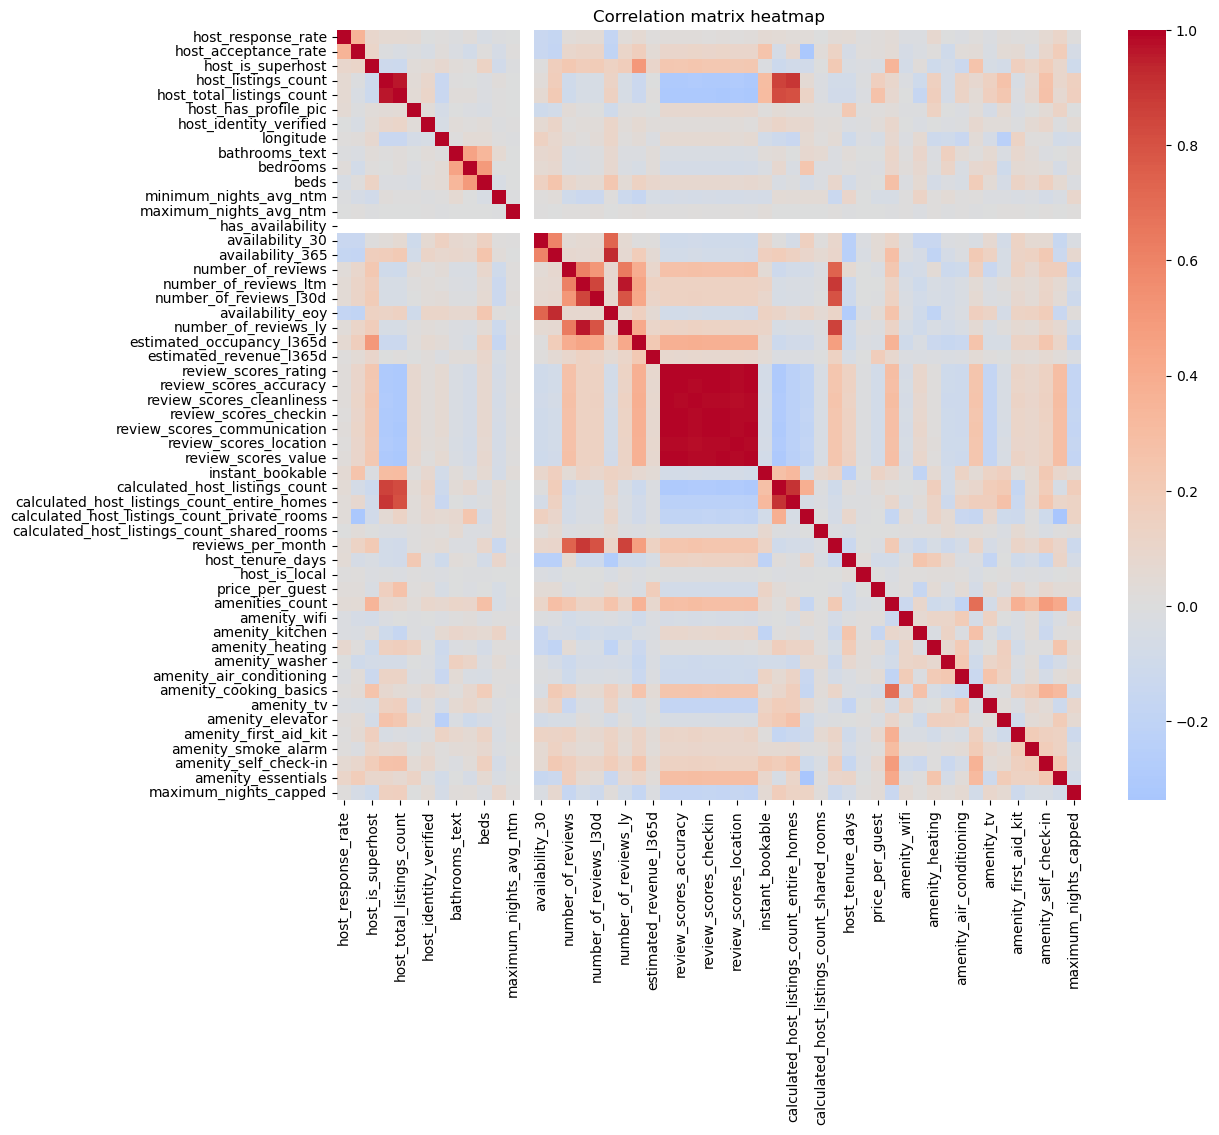

In [39]:
# Evaluation of the correlation among features in order to drop features that are not relevant for the target

numeric_cols = fifth_df.select_dtypes(include=["float64", "int64"]).columns

corr_matrix = fifth_df[numeric_cols].corr()

target_corr = corr_matrix["reviews_per_month"].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation matrix heatmap")
plt.show()

In [40]:
#Defining low correlated features and dropping = features with below 0.01

low_correlated_features = [
    
    "maximum_nights_avg_ntm", "host_has_profile_pic", "host_is_local", "amenity_elevator", "new_host_about",
    "calculated_host_listings_count_shared_rooms", "price_per_guest", "bedrooms", "bathrooms_text",
    "amenity_heating", "amenity_tv", "calculated_host_listings_count_private_rooms", "amenity_wifi", 
    "amenity_air_conditioning", "calculated_host_listings_count_entire_homes", "host_listings_count", 
    "host_total_listings_count", "calculated_host_listings_count", "amenity_washer", "amenity_kitchen", 
    "maximum_nights_capped", "host_tenure_days", "minimum_nights_avg_ntm", "has_availability", 
    "new_host_picture_url", "new_picture_url"
]

sixth_df = fifth_df.drop(columns=low_correlated_features, axis=1)

In [41]:
#Spltting into train and test data 


df_train, df_test = sklearn.model_selection.train_test_split(sixth_df, test_size=0.2)

print("fifth_df", sixth_df.shape)
print("df_train", df_train.shape)
print("df_test", df_test.shape)

fifth_df (36305, 45)
df_train (29044, 45)
df_test (7261, 45)


In [42]:
#Defining variables

x_train = df_train.drop("reviews_per_month", axis=1)
y_train = df_train["reviews_per_month"]
x_test = df_test.drop("reviews_per_month", axis=1)
y_test = df_test["reviews_per_month"]

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (29044, 44)
y_train (29044,)
x_test (7261, 44)
y_test (7261,)


# 5. Feature Engineering

In [43]:
#Encoding and Normalization of data points

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = x_train.select_dtypes(include=["object","category"]).columns.tolist()
numerical_features = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# 6. Model Training

In [44]:
import sklearn.model_selection
import sklearn.ensemble

In [45]:
# 1st Experiment - Lasso Regression

from sklearn.linear_model import LassoCV
from sklearn.model_selection import ShuffleSplit

alphas = np.logspace(-3, 0, 15)
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

lasso_cv = LassoCV(alphas=alphas, cv=cv, random_state=42, max_iter=1000, verbose=True, n_jobs=-1)

lasso_cv.fit(x_train_preprocessed, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
.............................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished


LassoCV(alphas=array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
        cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.3, train_size=None),
        n_jobs=-1, random_state=42, verbose=True)

In [46]:
# 2nd Experiment - Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": np.logspace(-4, 4, 50)
}

cv_ridge = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    cv=cv_ridge, 
    verbose=2,
    n_jobs=-1
)

ridge.fit(x_train_preprocessed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-0...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             verbose=2)

In [47]:
# 3rd Experiment - Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

cv_rf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_depth": [10, 20, None]
}

rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=cv_rf, 
    verbose=2,
    n_jobs=-1
)

rf.fit(x_train_preprocessed, y_train)

# printing best parameters
rf_best = rf.best_estimator_
print(" Best Parameters:", rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Best Parameters: {'max_depth': 20, 'n_estimators': 50}


In [48]:
# 4th Experiment - Support Vector Regression (SVR)

from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=0.5, epsilon=0.2, random_state=42, tol=1e-2, max_iter=5000)

linear_svr.fit(x_train_preprocessed, y_train)

LinearSVR(C=0.5, epsilon=0.2, max_iter=5000, random_state=42, tol=0.01)

In [49]:
# 5th Experiment - XGBoost

from xgboost import XGBRegressor

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0],
}

cv_xgb = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_jobs=-1,
    verbosity=1,
    random_state=42,
    tree_method="hist"
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv_xgb,
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(x_train_preprocessed, y_train)

xgb_best = xgb_grid.best_estimator_
print("Best Parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


# 7. Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Regression metrics report:")
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" Mean Absolute Error (MAE): {mae:.4f}")
    print(f" R2 Score: {r2:.4f}")

    return {"MSE": mse, "MAE":mae, "R2": r2}

In [51]:
# 1st Experiment Evaluation - Lasso Regression

y_pred_lasso = lasso_cv.predict(x_test_preprocessed)
regression_report(y_test, y_pred_lasso)

Regression metrics report:
 Mean Squared Error (MSE): 0.3210
 Mean Absolute Error (MAE): 0.2388
 R2 Score: 0.7812


{'MSE': 0.321045693913515,
 'MAE': 0.23880355385148652,
 'R2': 0.7812373812202853}

In [52]:
# 2nd Experiment Evaluation - Ridge Regression

y_pred_ridge = ridge.predict(x_test_preprocessed)
regression_report(y_test, y_pred_ridge)

Regression metrics report:
 Mean Squared Error (MSE): 0.3184
 Mean Absolute Error (MAE): 0.2455
 R2 Score: 0.7830


{'MSE': 0.31842286995910196,
 'MAE': 0.24545381655756945,
 'R2': 0.7830245904797253}

In [53]:
# 3rd Experiment Evaluation - Random Forest Regression

y_pred_rf = rf_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_rf)

Regression metrics report:
 Mean Squared Error (MSE): 0.1895
 Mean Absolute Error (MAE): 0.1253
 R2 Score: 0.8709


{'MSE': 0.1895025329495755,
 'MAE': 0.12527452594381633,
 'R2': 0.8708717445542005}

In [54]:
# 4th Experiment Evaluation - Support Vector Regression (SVR)

y_pred_svr = linear_svr.predict(x_test_preprocessed)
regression_report(y_test, y_pred_svr)

Regression metrics report:
 Mean Squared Error (MSE): 0.3346
 Mean Absolute Error (MAE): 0.2587
 R2 Score: 0.7720


{'MSE': 0.3346201846995226,
 'MAE': 0.2587117772577957,
 'R2': 0.7719876351272943}

In [55]:
# 5th Experiment Evaluation - XGBoost

from xgboost import XGBRegressor

y_pred_xgb = xgb_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_xgb)


Regression metrics report:
 Mean Squared Error (MSE): 0.1353
 Mean Absolute Error (MAE): 0.1437
 R2 Score: 0.9078


{'MSE': 0.13528749935104017,
 'MAE': 0.1437331709035715,
 'R2': 0.9078142201958168}